In [ ]:
#import libraries
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.datasets import fashion_mnist #
import keras.models as models
import keras.layers as layers
from keras import regularizers
from keras.layers import Dropout

In [ ]:
#from keras.engine.sequential import Sequential
#tensor flow-> layers
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model ##squnce of process
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout,Conv2D,MaxPooling2D   #bipertate graph 
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.utils import to_categorical #for catagorical data

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/"MyDrive/dataset_ml/Train_set"

/content/drive/MyDrive/dataset_ml/Train_set


In [ ]:
dataset = pd.read_csv('train.csv')
dataset.shape

(7095, 3)

In [ ]:
dataset

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...
...,...,...,...
7090,ffcf72ecf.jpg,3,121911 34 122167 101 122422 169 122678 203 122...
7091,fff02e9c5.jpg,3,207523 3 207777 9 208030 15 208283 22 208537 2...
7092,fffe98443.jpg,3,105929 5 106177 14 106424 24 106672 33 106923 ...
7093,ffff4eaa8.jpg,3,16899 7 17155 20 17411 34 17667 47 17923 60 18...


In [ ]:
data=dataset.values[:7095,0:2]#5000 image for train
print(data.shape)
data

(7095, 2)


array([['0002cc93b.jpg', 1],
       ['0007a71bf.jpg', 3],
       ['000a4bcdd.jpg', 1],
       ...,
       ['fffe98443.jpg', 3],
       ['ffff4eaa8.jpg', 3],
       ['ffffd67df.jpg', 3]], dtype=object)

In [ ]:
#code for taking class 2 only
i=0
j=0
k=0
democlasses=[]
demoimage=[]
while(i!=245):
  if(data[j][1]==2):
    democlasses.append(data[j][1])
    demoimage.append(data[j][0])
    i+=1
    j+=1
  else:
    j+=1

#code for taking class 1 only
i=0
j=0
while(i!=245):
  if(data[j][1]==1):
    democlasses.append(data[j][1])
    demoimage.append(data[j][0])
    i+=1
    j+=1
  else:
    j+=1

#code for taking class 3 only
i=0
j=0
while(i!=245):
  if(data[j][1]==3):
    democlasses.append(data[j][1])
    demoimage.append(data[j][0])
    i+=1
    j+=1
  else:
    j+=1

#code for taking class 4 only
i=0
j=0
while(i!=245):
  if(data[j][1]==4):
    democlasses.append(data[j][1])
    demoimage.append(data[j][0])
    i+=1
    j+=1
  else:
    j+=1

In [ ]:
#democlasses = np.array(democlasses)
print(len(demoimage))
print(type(democlasses))
print(len(democlasses))

980
<class 'list'>
980


In [ ]:
image=[]
classes=[]
for i in range(980):
  img=cv2.imread(data[i][0])#read 5000 setof image
  img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  image.append(img2)#append all the image in imge
  classes.append(data[i][1])#append all the class in classes

#px.imshow(img2,binary_string=True)
print(type(image))
print(type(classes))
image=np.array(image)
classes=np.array(classes)
print(type(image))
print(type(classes))
image

<class 'list'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


array([[[ 70,  70,  68, ...,  48,  48,  50],
        [ 66,  68,  68, ...,  48,  49,  51],
        [ 61,  64,  65, ...,  49,  51,  54],
        ...,
        [155, 133, 131, ...,  51,  51,  50],
        [160, 111, 100, ...,  55,  54,  48],
        [155, 114,  98, ...,  58,  58,  50]],

       [[ 47,  49,  49, ...,  65,  67,  63],
        [ 49,  51,  52, ...,  64,  66,  67],
        [ 49,  51,  51, ...,  61,  62,  67],
        ...,
        [106, 109, 100, ...,  98,  86,  85],
        [103, 110, 106, ...,  86,  85,  85],
        [103, 111, 107, ...,  83,  90,  90]],

       [[ 52,  51,  51, ...,  45,  45,  44],
        [ 53,  50,  49, ...,  48,  48,  47],
        [ 54,  51,  50, ...,  47,  47,  47],
        ...,
        [ 77,  78,  78, ...,  76,  75,  79],
        [ 72,  79,  78, ...,  76,  75,  78],
        [ 69,  79,  78, ...,  74,  74,  78]],

       ...,

       [[ 62,  69,  64, ...,  59,  57,  56],
        [ 69,  68,  59, ...,  58,  58,  58],
        [ 68,  69,  63, ...,  55,  54,  56

[[ 70  70  68 ...  48  48  50]
 [ 66  68  68 ...  48  49  51]
 [ 61  64  65 ...  49  51  54]
 ...
 [155 133 131 ...  51  51  50]
 [160 111 100 ...  55  54  48]
 [155 114  98 ...  58  58  50]]


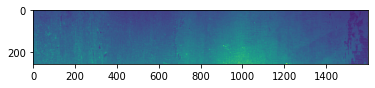

In [ ]:
plt.imshow(image[0])
print(image[0])

In [ ]:
#model training task
#split into validation and train
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(image,classes,test_size=0.2,random_state=13)

In [ ]:
print(train_x.shape,train_y.shape)

(784, 256, 1600) (784,)


In [ ]:
print(test_x.shape,test_y.shape)

(196, 256, 1600) (196,)


In [ ]:
classes=np.unique(train_y)
nclasses=len(classes)
print(classes)
print(nclasses)

[1 2 3 4]
4


In [ ]:
classes=np.unique(test_y)
nclasses=len(classes)
print(classes)
print(nclasses)

[1 2 3 4]
4


In [ ]:
#reshape image
train_x=train_x.reshape(-1,256,1600,1)
test_x=test_x.reshape(-1,256,1600,1)


In [ ]:


print(train_x.shape,train_y.shape)
print(test_x.shape,test_y.shape)

(784, 256, 1600, 1) (784,)
(196, 256, 1600, 1) (196,)


In [ ]:
train_y.shape[0]

784

In [ ]:
#converting value 0-1
#type convertion to avoid integer
train_x=train_x.astype('float32')
test_x=test_x.astype('float32')
train_x=train_x/255
test_x=test_x/255

In [ ]:
train_x

array([[[[0.44705883],
         [0.43137255],
         [0.4117647 ],
         ...,
         [0.21568628],
         [0.21176471],
         [0.21960784]],

        [[0.3647059 ],
         [0.3529412 ],
         [0.3254902 ],
         ...,
         [0.24313726],
         [0.23529412],
         [0.23921569]],

        [[0.33333334],
         [0.3647059 ],
         [0.36862746],
         ...,
         [0.24705882],
         [0.22745098],
         [0.22352941]],

        ...,

        [[0.56078434],
         [0.57254905],
         [0.5647059 ],
         ...,
         [0.4117647 ],
         [0.41960785],
         [0.3882353 ]],

        [[0.5294118 ],
         [0.54901963],
         [0.5254902 ],
         ...,
         [0.4509804 ],
         [0.48235294],
         [0.42745098]],

        [[0.52156866],
         [0.54901963],
         [0.49803922],
         ...,
         [0.44313726],
         [0.48235294],
         [0.41568628]]],


       [[[0.01568628],
         [0.01568628],
         [0.01

In [ ]:
train_one_hot=to_categorical(train_y)
test_one_hot=to_categorical(test_y)

In [ ]:
print(train_one_hot[777])
print(train_one_hot)

[0. 0. 0. 0. 1.]
[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]


In [ ]:
train_y_one_hot = []
#train_y_one_hot = np.append(train_y_one_hot, np.array([[11, 21, 31, 41]]), axis=0)
print(train_y_one_hot)
#train_y_one_hot=np.array(train_y_one_hot)
test_y_one_hot=[]
#test_y_one_hot=np.array(test_y_one_hot)


[]


In [ ]:
for i in range(0,784):
  train=np.delete(train_one_hot[i],0)
  train_y_one_hot.append(train)
  #train_y_one_hot = np.append(train_y_one_hot, train, axis=0)
  #print(train)

for i in range(0,196):
  test=np.delete(test_one_hot[i],0)
  test_y_one_hot.append(test)
  #train_y_one_hot = np.append(train_y_one_hot, train, axis=0)
  #print(train)





In [ ]:
train_y_one_hot

[array([0., 0., 0., 1.], dtype=float32),
 array([0., 0., 0., 1.], dtype=float32),
 array([0., 0., 1., 0.], dtype=float32),
 array([0., 0., 1., 0.], dtype=float32),
 array([0., 0., 1., 0.], dtype=float32),
 array([0., 0., 1., 0.], dtype=float32),
 array([0., 0., 1., 0.], dtype=float32),
 array([1., 0., 0., 0.], dtype=float32),
 array([0., 0., 1., 0.], dtype=float32),
 array([0., 0., 1., 0.], dtype=float32),
 array([0., 0., 1., 0.], dtype=float32),
 array([0., 0., 0., 1.], dtype=float32),
 array([0., 0., 1., 0.], dtype=float32),
 array([0., 0., 1., 0.], dtype=float32),
 array([0., 0., 1., 0.], dtype=float32),
 array([0., 0., 1., 0.], dtype=float32),
 array([1., 0., 0., 0.], dtype=float32),
 array([0., 0., 1., 0.], dtype=float32),
 array([0., 1., 0., 0.], dtype=float32),
 array([0., 0., 1., 0.], dtype=float32),
 array([0., 0., 1., 0.], dtype=float32),
 array([0., 0., 1., 0.], dtype=float32),
 array([0., 0., 1., 0.], dtype=float32),
 array([0., 0., 1., 0.], dtype=float32),
 array([0., 0., 

In [ ]:
train_y_one_hot=np.array(train_y_one_hot)
test_y_one_hot=np.array(test_y_one_hot)
print(train_y_one_hot)
print(type(train_y_one_hot))

[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]
<class 'numpy.ndarray'>


In [ ]:
print(train_y_one_hot[1])
print(type(train_y_one_hot))

[0. 0. 0. 1.]
<class 'numpy.ndarray'>


In [ ]:
test_y_one_hot

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],


In [ ]:
classes=np.unique(test_y_one_hot)
nclasses=len(classes)
print(classes)
print(nclasses)

[0. 1.]
2


In [ ]:
test_y_one_hot[1]


array([0., 0., 1., 0.], dtype=float32)

In [ ]:
train_y_one_hot[1]

array([0., 0., 0., 1.], dtype=float32)

In [ ]:
#model training task
#split into validation and train
from sklearn.model_selection import train_test_split
train_x,valid_x,train_label,valid_label=train_test_split(train_x,train_y_one_hot,test_size=0.2,random_state=13)

In [ ]:
train_x.shape,valid_x.shape,train_label.shape,valid_label.shape

((627, 256, 1600, 1), (157, 256, 1600, 1), (627, 4), (157, 4))

In [ ]:
batch_size=10#there is total 48000 image from that we are taking 64 student batch
epochs=20
num_classes=4


In [ ]:
#declaration of Sequential model
model=tf.keras.Sequential()

In [ ]:
#1 hidden layer
model.add(tf.keras.layers.Conv2D(32,(3,3),activation="linear",padding="same"))#valid->not any padding,same=same size 
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))#alpha is slop of line in nagative part
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding="same"))

In [ ]:
#2 hidden layer
model.add(tf.keras.layers.Conv2D(64,(3,3),activation="linear",padding="same"))#valid->not any padding,same=same size 
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))#alpha is slop of line in nagative part
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding="same"))

In [ ]:
#3 hidden layer
model.add(tf.keras.layers.Conv2D(128,(3,3),activation="linear",padding="same"))#valid->not any padding,same=same size 
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))#alpha is slop of line in nagative part
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding="same"))

In [ ]:
model.add(tf.keras.layers.Flatten())

In [ ]:
model.add(tf.keras.layers.Dense(128,activation="linear"))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
#output final layer
model.add(tf.keras.layers.Dense(num_classes,activation='softmax'))#softmax because we want probabbility of all 10 class

In [ ]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
print(valid_x.shape)
print(valid_label.shape)

(157, 256, 1600, 1)
(157, 4)


In [ ]:
model_train=model.fit(train_x,train_label,batch_size=10,epochs=10,verbose=1,validation_data=(valid_x,valid_label))#verbose is show process

Epoch 1/10
63/63 [==============================] - 37s 405ms/step - loss: 1.6357 - accuracy: 0.6858 - val_loss: 0.9312 - val_accuracy: 0.6752
Epoch 2/10
63/63 [==============================] - 24s 378ms/step - loss: 0.8322 - accuracy: 0.7193 - val_loss: 0.9196 - val_accuracy: 0.7006
Epoch 3/10
63/63 [==============================] - 25s 392ms/step - loss: 0.7699 - accuracy: 0.7193 - val_loss: 0.7294 - val_accuracy: 0.7325
Epoch 4/10
63/63 [==============================] - 24s 379ms/step - loss: 0.7567 - accuracy: 0.7241 - val_loss: 0.7680 - val_accuracy: 0.7261
Epoch 5/10
63/63 [==============================] - 24s 379ms/step - loss: 0.7043 - accuracy: 0.7368 - val_loss: 0.7567 - val_accuracy: 0.7261
Epoch 6/10
63/63 [==============================] - 24s 381ms/step - loss: 0.6603 - accuracy: 0.7416 - val_loss: 0.9199 - val_accuracy: 0.6815
Epoch 7/10
63/63 [==============================] - 24s 379ms/step - loss: 0.5431 - accuracy: 0.7847 - val_loss: 0.7564 - val_accuracy: 0.7006

In [ ]:
testing_evaluation=model.evaluate(test_x,test_y_one_hot)


7/7 [==============================] - 4s 350ms/step - loss: 1.1085 - accuracy: 0.6786


In [ ]:
testing_evaluation #loss,accuracy

[1.1085442304611206, 0.6785714030265808]

In [ ]:
accuracy=model_train.history['accuracy']
val_accuracy=model_train.history['val_accuracy']
loss=model_train.history['loss']
val_loss=model_train.history['val_loss']
epochs=range(len(accuracy))

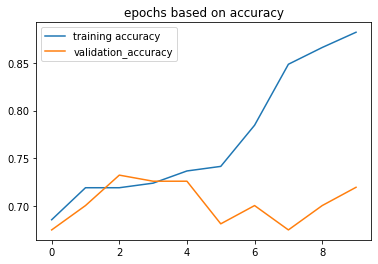

In [ ]:
plt.plot(epochs,accuracy,label='training accuracy')
plt.plot(epochs,val_accuracy,label='validation_accuracy')
plt.title('epochs based on accuracy')
plt.legend()
plt.show()

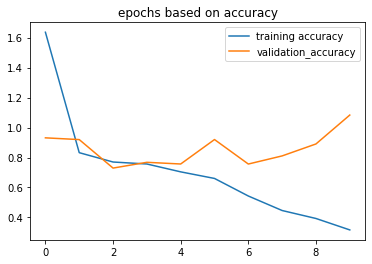

In [ ]:
plt.plot(epochs,loss,label='training accuracy')
plt.plot(epochs,val_loss,label='validation_accuracy')
plt.title('epochs based on accuracy')
plt.legend()
plt.show()

In [ ]:
#based on graph we can said that over model is overfitting
#so we have to do regularization

#declaration of Sequential model
regmodel=tf.keras.Sequential()

#1 hidden layer
regmodel.add(tf.keras.layers.Conv2D(32,(3,3),activation="linear",padding="same"))#valid->not any padding,same=same size 
regmodel.add(tf.keras.layers.LeakyReLU(alpha=0.1))#alpha is slop of line in nagative part
regmodel.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding="same"))
regmodel.add(tf.keras.layers.Dropout(0.25))

#2 hidden layer
regmodel.add(tf.keras.layers.Conv2D(64,(3,3),activation="linear",padding="same"))#valid->not any padding,same=same size 
regmodel.add(tf.keras.layers.LeakyReLU(alpha=0.1))#alpha is slop of line in nagative part
regmodel.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding="same"))
regmodel.add(tf.keras.layers.Dropout(0.25))

#3 hidden layer
regmodel.add(tf.keras.layers.Conv2D(128,(3,3),activation="linear",padding="same"))#valid->not any padding,same=same size 
regmodel.add(tf.keras.layers.LeakyReLU(alpha=0.1))#alpha is slop of line in nagative part
regmodel.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),padding="same"))
regmodel.add(tf.keras.layers.Dropout(0.40))
regmodel.add(tf.keras.layers.Flatten())
regmodel.add(tf.keras.layers.Dense(128,activation="linear"))
regmodel.add(tf.keras.layers.LeakyReLU(alpha=0.1))
regmodel.add(tf.keras.layers.Dropout(0.3))

#output final layer
regmodel.add(tf.keras.layers.Dense(num_classes,activation='softmax'))#softmax because we want probabbility of all 10 class


In [ ]:
regmodel.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
reg_model_train=regmodel.fit(train_x,train_label,batch_size=10,epochs=10,verbose=1,validation_data=(valid_x,valid_label))#verbose is show process

Epoch 1/10
63/63 [==============================] - 27s 404ms/step - loss: 4.5404 - accuracy: 0.6459 - val_loss: 1.6078 - val_accuracy: 0.6815
Epoch 2/10
63/63 [==============================] - 25s 401ms/step - loss: 0.9042 - accuracy: 0.7193 - val_loss: 1.7586 - val_accuracy: 0.6178
Epoch 3/10
63/63 [==============================] - 25s 405ms/step - loss: 0.8485 - accuracy: 0.7209 - val_loss: 1.7532 - val_accuracy: 0.6624
Epoch 4/10
63/63 [==============================] - 25s 404ms/step - loss: 0.8329 - accuracy: 0.7177 - val_loss: 1.2456 - val_accuracy: 0.5414
Epoch 5/10
63/63 [==============================] - 26s 405ms/step - loss: 0.8433 - accuracy: 0.7129 - val_loss: 1.8856 - val_accuracy: 0.6115
Epoch 6/10
63/63 [==============================] - 25s 404ms/step - loss: 0.8042 - accuracy: 0.7257 - val_loss: 0.7941 - val_accuracy: 0.7134
Epoch 7/10
63/63 [==============================] - 25s 403ms/step - loss: 0.7783 - accuracy: 0.7209 - val_loss: 1.1269 - val_accuracy: 0.3567

In [ ]:
testing_evaluation_rg=regmodel.evaluate(test_x,test_y_one_hot)

7/7 [==============================] - 2s 260ms/step - loss: 0.8574 - accuracy: 0.6735


In [ ]:
testing_evaluation_rg #loss,accuracy

[0.8574106097221375, 0.6734693646430969]

In [ ]:
reg_model_train.history

{'accuracy': [0.6459330320358276,
  0.719298243522644,
  0.720893144607544,
  0.7177033424377441,
  0.7129186391830444,
  0.7256778478622437,
  0.720893144607544,
  0.7320573925971985,
  0.7272727489471436,
  0.7256778478622437],
 'loss': [4.540424346923828,
  0.9041980504989624,
  0.8485251665115356,
  0.8329122066497803,
  0.8432847857475281,
  0.8041791319847107,
  0.7783027291297913,
  0.802110493183136,
  0.7607107758522034,
  0.7575175762176514],
 'val_accuracy': [0.6815286874771118,
  0.6178343892097473,
  0.662420392036438,
  0.5414012670516968,
  0.6114649772644043,
  0.7133758068084717,
  0.35668790340423584,
  0.36942675709724426,
  0.7324841022491455,
  0.6942675113677979],
 'val_loss': [1.607753038406372,
  1.7585843801498413,
  1.7532382011413574,
  1.245573878288269,
  1.8855507373809814,
  0.794147789478302,
  1.1268559694290161,
  1.0811797380447388,
  0.7879035472869873,
  0.8270518183708191]}

In [ ]:
accuracy_reg=reg_model_train.history['accuracy']
val_accuracy_reg=reg_model_train.history['val_accuracy']
loss_reg=reg_model_train.history['loss']
val_loss_reg=reg_model_train.history['val_loss']
epochs_reg=range(len(accuracy_reg))

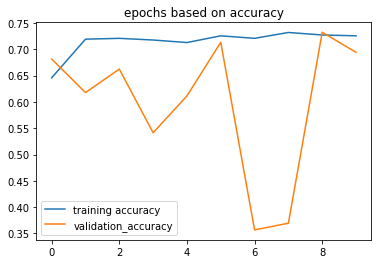

In [ ]:
plt.plot(epochs_reg,accuracy_reg,label='training accuracy')
plt.plot(epochs_reg,val_accuracy_reg,label='validation_accuracy')
plt.title('epochs based on accuracy')
plt.legend()
plt.show()

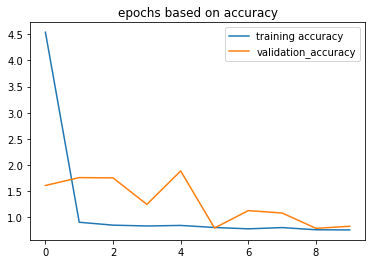

In [ ]:
plt.plot(epochs_reg,loss_reg,label='training accuracy')
plt.plot(epochs_reg,val_loss_reg,label='validation_accuracy')
plt.title('epochs based on accuracy')
plt.legend()
plt.show()